# MA934 - class 1

You should make at least one commit to your repository per computational task below - usually more.


## Task 1

Make sure that you can run the sample code in main.jl

Add a new function to the module Starter.jl that reads in parameters $\alpha$ and $n$ and produces a log plot of some samples of the function $$f(x) = x^\alpha \, \log(x)$$
at values of $x$ that increase in powers of 2 from 1 to $2^n$. This should only involve minor modifications of the existing code.

## Task 2

Write a new module containing functions that compute the $n^{th}$ term, $a_n$, in the Fibonacci sequence:
 * Iteratively
 * Recursively
 * Using memoization (hint: use Julia's Dict type for the lookup table)
 
The functions should work starting from any given values of $a_1$ and $a_2$.

Use the BenchmarkTools.jl package to measure the run-time of each of these functions over a range of values of $n$ and produce a plot to illustrate your results.

The recursive function implementation gets slow very quickly - I could only do up to $n=48$ on my laptop. Write a recursion relation for the computational complexity of the recursive version of the task. Solve it to prove that the computational complexity grows exponentially with $n$.

## Task 3

The computational complexity of the naive divide-and-conquer algorithm for matrix multiplication satisfies the functional equation $$F(n) = 8 F(n/2) + 4 (n/2)^2$$ with $F(1)=1$.

The corresponding equation for Strassen multiplication is $$F(n) = 7 F(n/2) + 18 (n/2)^2$$ with $F(1)=1$.

Solve these recurrence relations explicitly to prove that the computational complexity of the two algorithms are $O(n^3)$ and $O(n^{\log_2(7)})$ respectively. 

It is helpful to adopt the change of variables $n=2^p$ with $a_p = F(2^p)$ to obtain linear (albeit inhomogeneous) recursion relations. 

Some helpful online notes about solving recursion relations can be found at:

https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm

In [1]:
push!(LOAD_PATH, pwd())

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "C:\\Users\\chepb\\OneDrive\\Documents\\Warwick\\MA934 - Numerical algorithms and optimization\\class-1\\class-1"

In [5]:
import Pkg
Pkg.add("Plots")
Pkg.add("YAML")

   Updating registry at `C:\Users\chepb\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\chepb\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\chepb\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\chepb\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\chepb\.julia\environments\v1.5\Manifest.toml`


args[group2][parameter3] = 10.0

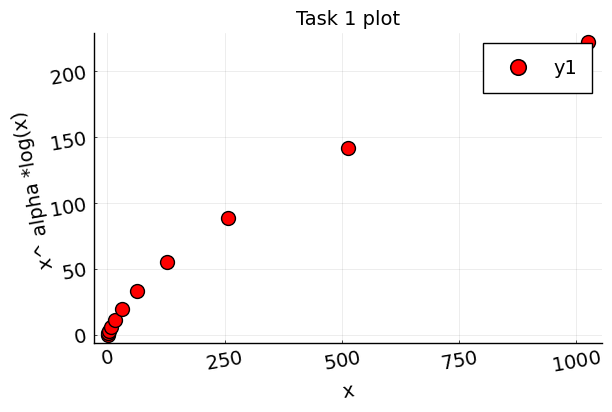

  Type = Float64
args[group2][parameter4] = test.csv  Type = String
args[group1][parameter1] = 10  Type = Int64
args[group1][parameter2] = This is some text  Type = String


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [2]:
include("main.jl")

In [21]:
Pkg.add("Revise")
Pkg.add("BenchmarkTools")

  Resolving package versions...
No Changes to `C:\Users\chepb\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\chepb\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
  Installed BenchmarkTools ─ v0.5.0
Updating `C:\Users\chepb\.julia\environments\v1.5\Project.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0
Updating `C:\Users\chepb\.julia\environments\v1.5\Manifest.toml`
  [6e4b80f9] + BenchmarkTools v0.5.0


In [20]:
using Revise
using Task2
a_iter = fibo_iter(1,1, 20)
a_recurs = fibo_recurs(0, 1, 6)
a_memo = fibo_memo(0, 1, 7)
println(a_memo)

8


In [28]:
using Revise
using BenchmarkTools
using Task2
n = 6
step = zeros(1,n)
a_iter = zeros(1,n)
a_recurs = zeros(1,n)
a_memo = zeros(1,n)
a_1 = 0
a_2 = 1
for i = 1:n
    step[i] = 2^(i-1)
    a = @btime fibo_iter(a_1, a_2, step[i])
    
    
end

println(a_iter)

  216.779 ns (3 allocations: 224 bytes)
  171.935 ns (3 allocations: 224 bytes)
  173.193 ns (3 allocations: 224 bytes)
  178.689 ns (3 allocations: 224 bytes)
  178.875 ns (3 allocations: 224 bytes)
  179.841 ns (3 allocations: 224 bytes)
[5.0 5.0 5.0 5.0 5.0 5.0]


In [35]:
using Revise
using BenchmarkTools
using Task2
a = @btime fibo_iter($a_1, $a_2, $7)
println(a)

  160.879 ns (3 allocations: 224 bytes)
8
